In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from ECD_control.ECD_pulse_construction.ECD_pulse_construction import *

In [4]:
#the parameters in our circuit. Can be user defined, or loaded from the result of an ECD optimization.
betas = np.array([2.5, 0.2+1j, -2+0.4j, 2])
phis = np.pi*np.array([0,0.75,1.0,-0.3])
thetas = np.pi*np.array([1.0,0.2,-0.8,1.3])
print('betas:' + str(betas))
print('phis:' + str(phis))
print('thetas:' + str(thetas))

betas:[ 2.5+0.j   0.2+1.j  -2. +0.4j  2. +0.j ]
phis:[ 0.          2.35619449  3.14159265 -0.9424778 ]
thetas:[ 3.14159265  0.62831853 -2.51327412  4.08407045]


In [7]:
#Our cavity and qubit. When using pulse construction on the FPGA, these objects can be loaded, and 
#the pre-calibrated values can be used. Here, we are making a "FakeCavity" and a "FakeQubit" in order
#to demonstrate the pulse construction when not connected to the FPGA_lib.

#The following parameters are assumed to be defined under your cavity and qubit entity object in FPGA lib.
storage_params = {'chi_kHz': -31.443834, 'chi_prime_Hz': -1.443865, 'Ks_Hz': -0.604457, 'epsilon_m_MHz': 409.154473, 'unit_amp': 0.018639, 'sigma': 10, 'chop': 4}
qubit_params = {'unit_amp': 0.291538, 'sigma': 8, 'chop': 4}

#creating the "Fake storage" and "Fake qubit"
storage = FakeStorage(**storage_params)
qubit = FakeQubit(**qubit_params)

#The alpha used during the ECD gates.
alpha_CD = 25.0
#Buffer time between R and ECD pulses.
buffer_time = 4

In [9]:
#generating the conditional displacement circuit with all corrections.
cd_circuit_dict = conditional_displacement_circuit(betas, phis, thetas, storage, qubit,
                     alpha_CD,  buffer_time=buffer_time, kerr_correction = False, chi_prime_correction=True, final_disp=False, pad=True)
cavity_dac_pulse, qubit_dac_pulse, = cd_circuit_dict['cavity_dac_pulse'], cd_circuit_dict['qubit_dac_pulse']

C:\ProgramData\Miniconda3\envs\opt3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


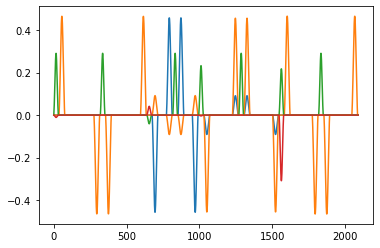

In [10]:
#plotting the pulse
plt.plot(np.real(cavity_dac_pulse), label='re(epsilon_dac)')
plt.plot(np.imag(cavity_dac_pulse), label='imag(epsilon_dac)')
plt.plot(np.real(qubit_dac_pulse), label='re(qubit_dac)')
plt.plot(np.imag(qubit_dac_pulse), label='imag(qubit_dac)')